In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import folium
from mpldatacursor import datacursor
from IPython.display import Image
apart = pd.read_excel("/home/has/Documents/amr_ws/project/최종본.xlsx")
apart 

,아파트명,매매가,공급면적,전용면적,전용률,평수,평당가격,역,연식,용적률,건폐율,위도,경도,주거지역,주소,상한 용적률,재개발수익률,지하철 거리
0,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,372,378
1,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,372,378
2,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,372,378
3,광명역써밋플레이스(주상복합),1000000000,120,84,70,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,372,378
4,광명역써밋플레이스(주상복합),1000000000,121,84,69,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,372,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,벽산빌리지,200000000,81,56,69,17.0,1179,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4130,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4131,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4132,벽산빌리지,190000000,73,50,68,15.2,1254,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899


In [3]:
station_cor_info = pd.read_csv('../project/station_info_GG.csv',encoding='utf-8')

In [4]:
lo_apt = pd.read_csv('../project/lo_apt.csv',encoding='utf-8')

In [5]:
del station_cor_info["Unnamed: 0"]

In [6]:
del lo_apt["Unnamed: 0"]

In [7]:
station_cor_info

,역 이름,주소,위도,경도
0,송도역,인천광역시 연수구 비류대로 175,126.654627,37.429936
1,연수역,인천광역시 연수구 벚꽃로 115,126.678964,37.417804
2,월곶역,경기도 시흥시 월곶동 992-8,126.742468,37.391447
3,인천논현역,인천광역시 남동구 청능대로 567,126.722564,37.400670
4,광명역,경기도 광명시 광명역로 21,126.884877,37.416364
5,안양역,경기도 안양시 만안구 만안로 232,126.923003,37.401435
6,인덕원역,경기도 안양시 동안구 관양동 1563,126.975672,37.402606
7,시흥시청역,경기도 시흥시 시흥대로 지하 467,126.805964,37.381433
8,석수역,경기도 안양시 만안구 경수대로 1431,126.902529,37.434342
9,서판교역,경기도 성남시 분당구 운중로 134-1,127.077873,37.391456


In [8]:
lo_apt

,아파트명,위도,경도,거리,역
0,르씨트빌모트,127.055921,37.392344,1872,서판교역
1,운중푸르지오하임(도시형),127.061478,37.392413,1504,서판교역
2,판교동양파크타운,127.059718,37.392655,1611,서판교역
3,판교파크하임에비뉴,127.057600,37.393211,1754,서판교역
4,더포레스트힐,126.932543,37.403856,983,안양역
...,...,...,...,...,...
233,진주마을풍림아이원1차,126.739114,37.390758,456,월곶역
234,남도타운(주상복합),126.814975,37.390870,1315,시흥시청역
235,써미트빌(주상복합),126.814579,37.390927,1297,시흥시청역
236,평촌더샵센트럴시티,126.962817,37.401055,1132,인덕원역


In [9]:
mapping = folium.Map([37.4, 126.9], zoom_start=11)

In [10]:
count = 0

for idx, row in station_cor_info.iterrows():
    folium.Circle(
    radius= 100,
    location=[row["경도"], row["위도"]],
    popup=station_cor_info["역 이름"][count],
    color="crimson",
    fill=True,
    ).add_to(mapping)
    
    folium.Circle(
    radius= 1000,
    location=[row["경도"], row["위도"]],
    popup="1000m",
    color="blue",
    fill=True,
    ).add_to(mapping)
    
    folium.Circle(
    radius= 500,
    location=[row["경도"], row["위도"]],
    popup="500m",
    color="orange",
    fill=True,
    ).add_to(mapping)
    
    count = count + 1

In [11]:
count = 0

for idx, row in lo_apt.iterrows():
    folium.Circle(
    radius=20,
    location=[row["경도"], row["위도"]],
    popup=lo_apt["아파트명"][count],
    color="green",
    fill=True,
    ).add_to(mapping)
    
    count = count + 1

### 월판선 매물 지도

### 빨간색 데이터 확인

In [12]:
mapping

In [13]:
for i in range (len(apart)):
    if apart["역"][i] == "광명역":
        apart["재개발수익률"][i] = 100

/tmp/ipykernel_5808/1682505469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apart["재개발수익률"][i] = 100


In [14]:
apart

,아파트명,매매가,공급면적,전용면적,전용률,평수,평당가격,역,연식,용적률,건폐율,위도,경도,주거지역,주소,상한 용적률,재개발수익률,지하철 거리
0,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378
1,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378
2,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378
3,광명역써밋플레이스(주상복합),1000000000,120,84,70,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378
4,광명역써밋플레이스(주상복합),1000000000,121,84,69,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,벽산빌리지,200000000,81,56,69,17.0,1179,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4130,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4131,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899
4132,벽산빌리지,190000000,73,50,68,15.2,1254,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899


In [15]:
matplotlib.rc('font', family='NanumGothic')

matplotlib.rcParams['axes.unicode_minus'] =False

In [16]:
apart["매매가"]=apart["매매가"].astype('int')

### 전체 세대 수 대비 데이터를 비교 하였으면  떠나고 싶은 동네인지 판별 가능

Text(0.5, 1.0, '역당 매물 수')

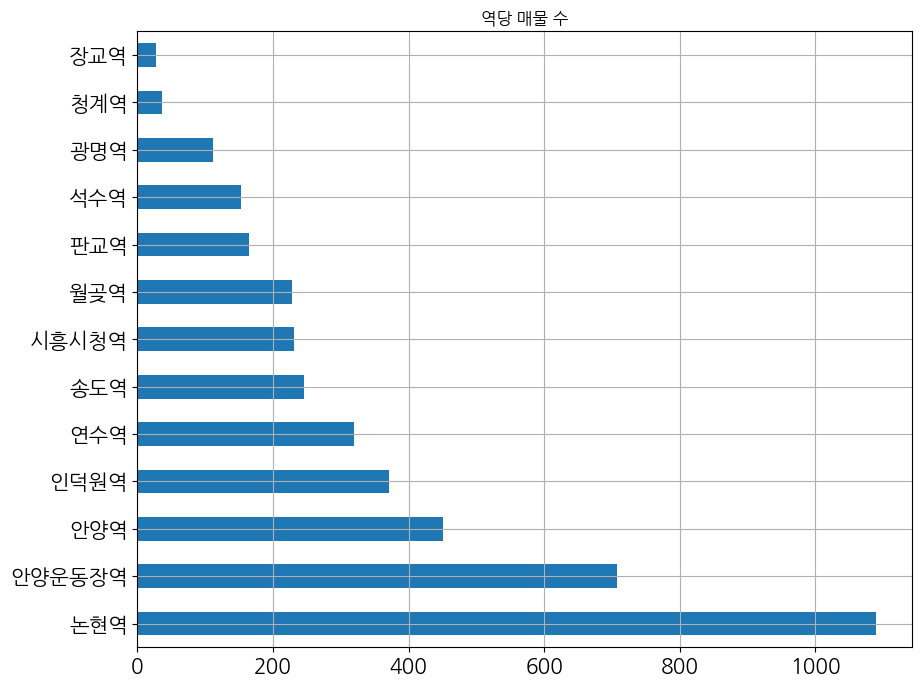

In [17]:
count = pd.value_counts(apart["역"].values, sort=True)
count.plot.barh()
count.plot.barh(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정
plt.title("역당 매물 수")

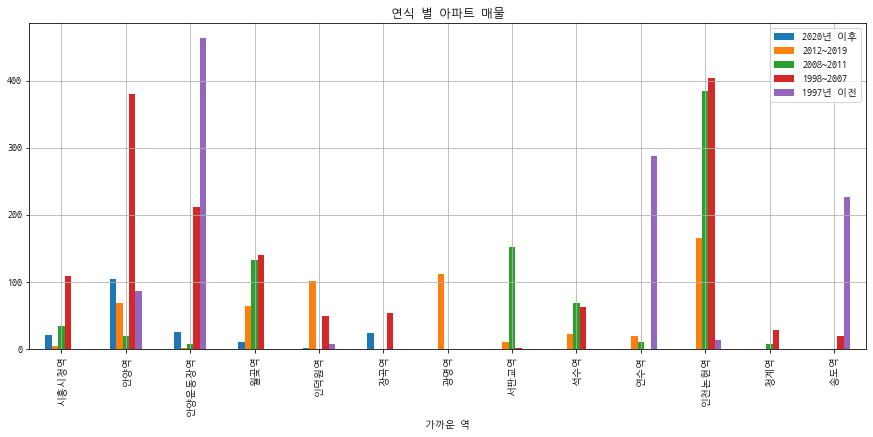

In [18]:
Image("/home/has/Downloads/output4.png") # code안에서 나오게 할 때

### 1. 각 역당 평균 매매가

In [19]:
mean=apart.groupby(['역'], as_index=False).mean()
mean

/tmp/ipykernel_5808/60067684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean=apart.groupby(['역'], as_index=False).mean()


,역,매매가,공급면적,전용면적,전용률,평수,평당가격,연식,용적률,건폐율,위도,경도,상한 용적률,재개발수익률,지하철 거리
0,광명역,1.166964e+09,110.883929,78.491071,70.464286,23.815179,4930.437500,2017.589286,344.250000,21.428571,126.884537,37.416079,1300.000000,100.000000,312.339286
1,논현역,5.965445e+08,125.756657,97.024793,76.553719,29.422406,2016.687787,2008.709826,239.132231,16.729109,126.728287,37.400090,365.335170,150.814509,1020.975207
2,석수역,7.449346e+08,95.732026,72.287582,75.281046,21.916993,3440.464052,2007.111111,213.169935,23.013072,126.903345,37.429552,244.444444,115.797386,529.836601
3,송도역,3.507878e+08,98.114286,76.293878,77.551020,23.146531,1538.216327,1995.465306,296.636735,22.106122,126.647612,37.424907,295.510204,101.342857,892.946939
4,시흥시청역,4.524935e+08,100.909091,77.138528,75.900433,23.400433,1919.160173,2007.740260,324.389610,31.251082,126.804023,37.381474,529.870130,151.883117,899.190476
5,안양역,6.510222e+08,91.682927,68.037694,73.771619,20.626608,3241.458980,2005.532151,307.203991,22.368071,126.924311,37.400512,352.217295,112.434590,593.798226
6,안양운동장역,7.106280e+08,94.431400,72.277228,75.618105,21.912023,3368.854314,2001.717115,276.437058,18.727016,126.939062,37.399145,292.079208,107.329562,888.223479
7,연수역,3.555768e+08,89.028213,69.611285,77.269592,21.096238,1716.705329,1995.630094,183.335423,20.695925,126.679240,37.415975,338.087774,201.090909,849.557994
8,월곶역,3.231842e+08,88.495614,66.653509,72.245614,20.212719,1688.793860,2006.302632,428.219298,36.228070,126.738731,37.389348,632.456140,147.596491,508.000000
9,인덕원역,8.218544e+08,86.986523,66.409704,75.900270,20.135040,4007.002695,1999.857143,233.150943,20.261456,126.963024,37.401154,324.663073,142.811321,817.196765


In [20]:
mean=mean.sort_values(by=["매매가"])
mean.loc[0, '재개발수익률'] = 100
mean

,역,매매가,공급면적,전용면적,전용률,평수,평당가격,연식,용적률,건폐율,위도,경도,상한 용적률,재개발수익률,지하철 거리
8,월곶역,3.231842e+08,88.495614,66.653509,72.245614,20.212719,1688.793860,2006.302632,428.219298,36.228070,126.738731,37.389348,632.456140,147.596491,508.000000
3,송도역,3.507878e+08,98.114286,76.293878,77.551020,23.146531,1538.216327,1995.465306,296.636735,22.106122,126.647612,37.424907,295.510204,101.342857,892.946939
7,연수역,3.555768e+08,89.028213,69.611285,77.269592,21.096238,1716.705329,1995.630094,183.335423,20.695925,126.679240,37.415975,338.087774,201.090909,849.557994
10,장교역,3.931893e+08,101.607143,80.642857,79.000000,24.460714,1597.857143,1999.428571,302.500000,26.857143,126.782269,37.379110,442.857143,136.250000,692.464286
4,시흥시청역,4.524935e+08,100.909091,77.138528,75.900433,23.400433,1919.160173,2007.740260,324.389610,31.251082,126.804023,37.381474,529.870130,151.883117,899.190476
1,논현역,5.965445e+08,125.756657,97.024793,76.553719,29.422406,2016.687787,2008.709826,239.132231,16.729109,126.728287,37.400090,365.335170,150.814509,1020.975207
5,안양역,6.510222e+08,91.682927,68.037694,73.771619,20.626608,3241.458980,2005.532151,307.203991,22.368071,126.924311,37.400512,352.217295,112.434590,593.798226
6,안양운동장역,7.106280e+08,94.431400,72.277228,75.618105,21.912023,3368.854314,2001.717115,276.437058,18.727016,126.939062,37.399145,292.079208,107.329562,888.223479
2,석수역,7.449346e+08,95.732026,72.287582,75.281046,21.916993,3440.464052,2007.111111,213.169935,23.013072,126.903345,37.429552,244.444444,115.797386,529.836601
9,인덕원역,8.218544e+08,86.986523,66.409704,75.900270,20.135040,4007.002695,1999.857143,233.150943,20.261456,126.963024,37.401154,324.663073,142.811321,817.196765


### 역별 평균 매매가 / 연식과의 상관관계 확인

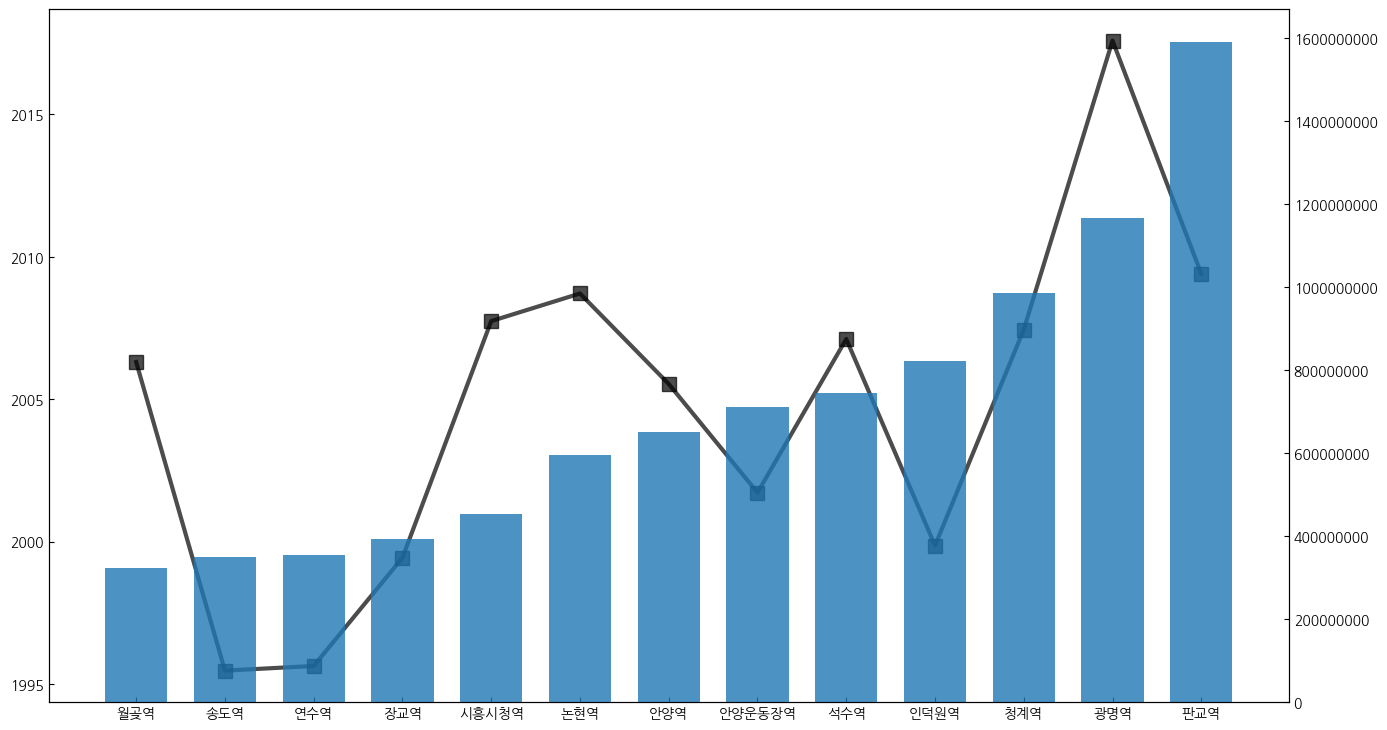

In [21]:
x = mean['역']
y1 = mean['연식']
y2 = mean['매매가']

fig, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(x, y1, '-s', color='black', markersize=10, linewidth=3, alpha=0.7 )
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='tab:blue', alpha=0.8, width=0.7)
ax2.tick_params(axis='y', direction='in')
plt.ticklabel_format(axis='y',useOffset=False, style='plain') #e값 날리기
plt.show()


### 역별 평균 매매가 / 재개발수익률과 상관관계 확인

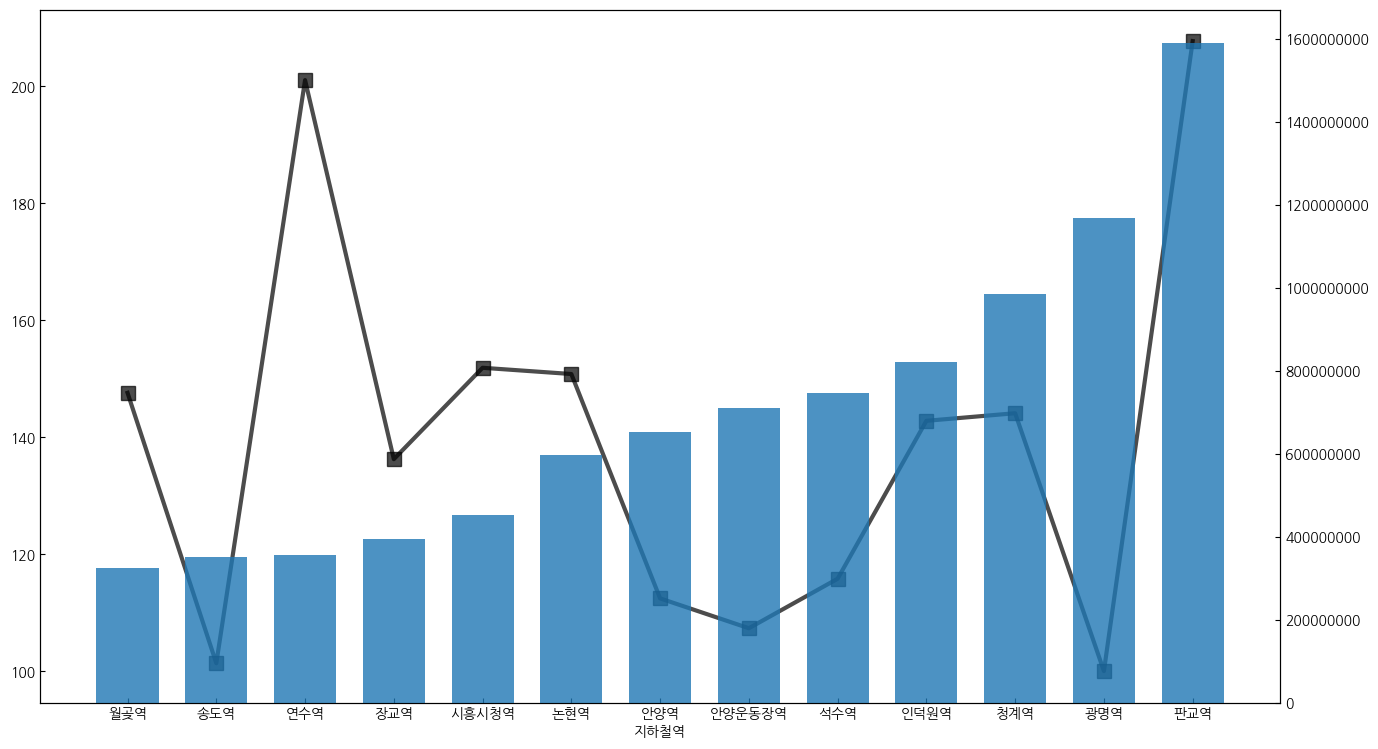

In [22]:
x = mean['역']
y1 = mean['재개발수익률']
y2 = mean['매매가']

fig, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(x, y1, '-s', color='black', markersize=10, linewidth=3, alpha=0.7 )
ax1.set_xlabel('지하철역')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='tab:blue', alpha=0.8, width=0.7)
ax2.tick_params(axis='y', direction='in')
plt.ticklabel_format(axis='y',useOffset=False, style='plain') #e값 날리기
plt.show()

### 2. 상대가격을 활용한 데이터분석

In [23]:
total=mean.drop(['공급면적','전용면적','전용률','평당가격','연식','용적률','건폐율','위도','경도','상한 용적률','재개발수익률','지하철 거리'],axis=1)
total=total.rename(columns = {'매매가':'평균매매가','평수':'평균평수'})
total 

,역,평균매매가,평균평수
8,월곶역,3.231842e+08,20.212719
3,송도역,3.507878e+08,23.146531
7,연수역,3.555768e+08,21.096238
10,장교역,3.931893e+08,24.460714
4,시흥시청역,4.524935e+08,23.400433
1,논현역,5.965445e+08,29.422406
5,안양역,6.510222e+08,20.626608
6,안양운동장역,7.106280e+08,21.912023
2,석수역,7.449346e+08,21.916993
9,인덕원역,8.218544e+08,20.135040


In [24]:
total["평균평당가격"]=total["평균매매가"]/total["평균평수"]/10000
total

,역,평균매매가,평균평수,평균평당가격
8,월곶역,3.231842e+08,20.212719,1598.915048
3,송도역,3.507878e+08,23.146531,1515.509002
7,연수역,3.555768e+08,21.096238,1685.498611
10,장교역,3.931893e+08,24.460714,1607.431742
4,시흥시청역,4.524935e+08,23.400433,1933.697160
1,논현역,5.965445e+08,29.422406,2027.517868
5,안양역,6.510222e+08,20.626608,3156.225464
6,안양운동장역,7.106280e+08,21.912023,3243.096541
2,석수역,7.449346e+08,21.916993,3398.890645
9,인덕원역,8.218544e+08,20.135040,4081.712427


In [25]:
total["평균평당가격"]=total["평균평당가격"].astype('str')
total['평균평당가격']=total.평균평당가격.str.split('.').str[0]
total

,역,평균매매가,평균평수,평균평당가격
8,월곶역,3.231842e+08,20.212719,1598
3,송도역,3.507878e+08,23.146531,1515
7,연수역,3.555768e+08,21.096238,1685
10,장교역,3.931893e+08,24.460714,1607
4,시흥시청역,4.524935e+08,23.400433,1933
1,논현역,5.965445e+08,29.422406,2027
5,안양역,6.510222e+08,20.626608,3156
6,안양운동장역,7.106280e+08,21.912023,3243
2,석수역,7.449346e+08,21.916993,3398
9,인덕원역,8.218544e+08,20.135040,4081


In [26]:
total=total.drop(['평균매매가','평균평수'],axis=1)
total

,역,평균평당가격
8,월곶역,1598
3,송도역,1515
7,연수역,1685
10,장교역,1607
4,시흥시청역,1933
1,논현역,2027
5,안양역,3156
6,안양운동장역,3243
2,석수역,3398
9,인덕원역,4081


In [27]:
total= pd.merge(apart,total, on='역' ,how='inner')
total

,아파트명,매매가,공급면적,전용면적,전용률,평수,평당가격,역,연식,용적률,건폐율,위도,경도,주거지역,주소,상한 용적률,재개발수익률,지하철 거리,평균평당가격
0,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900
1,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900
2,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900
3,광명역써밋플레이스(주상복합),1000000000,120,84,70,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900
4,광명역써밋플레이스(주상복합),1000000000,121,84,69,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,벽산빌리지,200000000,81,56,69,17.0,1179,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515
4130,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515
4131,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515
4132,벽산빌리지,190000000,73,50,68,15.2,1254,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515


In [28]:
total["평균평당가격"]=total["평균평당가격"].astype('int')
total["상대가격"]=total["평당가격"]/total["평균평당가격"]
total

,아파트명,매매가,공급면적,전용면적,전용률,평수,평당가격,역,연식,용적률,건폐율,위도,경도,주거지역,주소,상한 용적률,재개발수익률,지하철 거리,평균평당가격,상대가격
0,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900,0.761633
1,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900,0.761633
2,광명역써밋플레이스(주상복합),950000000,121,84,69,25.5,3732,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900,0.761633
3,광명역써밋플레이스(주상복합),1000000000,120,84,70,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900,0.801837
4,광명역써밋플레이스(주상복합),1000000000,121,84,69,25.5,3929,광명역,2018,349,19,126.880947,37.417103,일반상업지역,경기도 광명시 일직동 513,1300,100,378,4900,0.801837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,벽산빌리지,200000000,81,56,69,17.0,1179,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515,0.778218
4130,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515,0.817162
4131,벽산빌리지,210000000,81,56,69,17.0,1238,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515,0.817162
4132,벽산빌리지,190000000,73,50,68,15.2,1254,송도역,1991,61,21,126.656652,37.422392,보전녹지지역,인천시 연수구 옥련동 348-141,80,131,899,1515,0.827723


### 전용률과 지하철거리에 따른 가격 분포 확인 

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_5808/562919634.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs, ys, zs, c='darkgreen', marker='o', s=15, cmap='Greens')


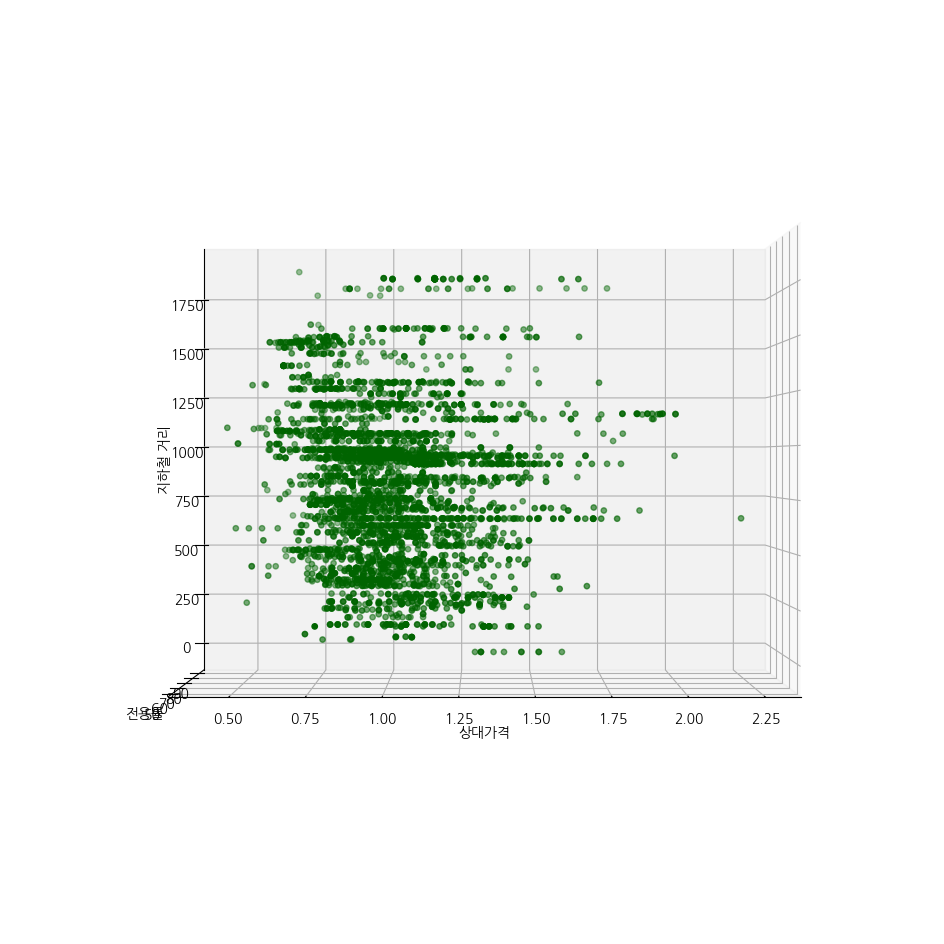

In [42]:
xs = total["상대가격"]
ys = total["전용률"]
zs = total["지하철 거리"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='darkgreen', marker='o', s=15, cmap='Greens')
ax.set_xlabel('상대가격')
ax.set_ylabel('전용률')
ax.set_zlabel('지하철 거리')
#ax.view_init(90,270)      #전용률
ax.view_init(0,270)       #지하철 거리

In [31]:
top_apart=apart.drop(['공급면적','전용면적','전용률','평수','연식','용적률','건폐율','위도','경도','주거지역','상한 용적률','지하철 거리'],axis=1)

In [32]:
top_apart

,아파트명,매매가,평당가격,역,주소,재개발수익률
0,광명역써밋플레이스(주상복합),950000000,3732,광명역,경기도 광명시 일직동 513,100
1,광명역써밋플레이스(주상복합),950000000,3732,광명역,경기도 광명시 일직동 513,100
2,광명역써밋플레이스(주상복합),950000000,3732,광명역,경기도 광명시 일직동 513,100
3,광명역써밋플레이스(주상복합),1000000000,3929,광명역,경기도 광명시 일직동 513,100
4,광명역써밋플레이스(주상복합),1000000000,3929,광명역,경기도 광명시 일직동 513,100
...,...,...,...,...,...,...
4129,벽산빌리지,200000000,1179,송도역,인천시 연수구 옥련동 348-141,131
4130,벽산빌리지,210000000,1238,송도역,인천시 연수구 옥련동 348-141,131
4131,벽산빌리지,210000000,1238,송도역,인천시 연수구 옥련동 348-141,131
4132,벽산빌리지,190000000,1254,송도역,인천시 연수구 옥련동 348-141,131


In [33]:
best_apart=top_apart.sort_values(by='평당가격', ascending=True).groupby('역', sort=False).head(10) # 평당가격
best_apart

,아파트명,매매가,평당가격,역,주소,재개발수익률
156,연성쉐르빌(주상복합),155000000,882,장교역,경기도 시흥시 장곡동 811-3,179
160,연성쉐르빌(주상복합),155000000,882,시흥시청역,경기도 시흥시 장곡동 811-3,179
3551,윤성,170000000,967,송도역,인천시 연수구 옥련동 194-12,169
161,연성쉐르빌(주상복합),150000000,971,시흥시청역,경기도 시흥시 장곡동 811-3,179
157,연성쉐르빌(주상복합),150000000,971,장교역,경기도 시흥시 장곡동 811-3,179
...,...,...,...,...,...,...
351,판교파크하임에비뉴,650000000,4125,판교역,경기도 성남시 분당구 운중동 357-1,102
1354,산운13단지휴먼시아데시앙,1050000000,4125,판교역,경기도 성남시 분당구 운중동 918,143
1343,산운14단지경남아너스빌,1550000000,4193,판교역,경기도 성남시 분당구 운중동 916,173
1356,산운13단지휴먼시아데시앙,1070000000,4204,판교역,경기도 성남시 분당구 운중동 918,143


### 각 역당 평당 최저가 탑 10 with 재개발 수익률

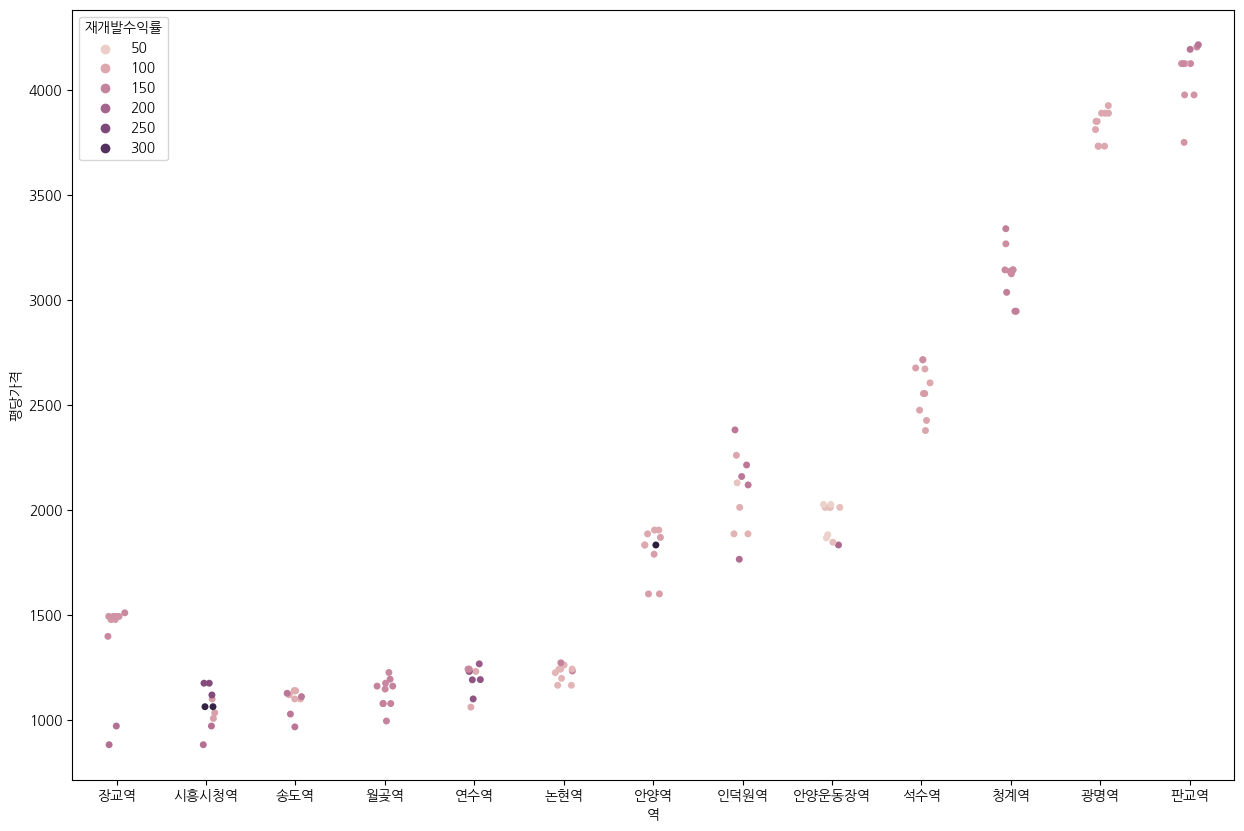

In [34]:
import matplotlib.pyplot as plt
from mpldatacursor import datacursor

plt.figure(figsize=(15,10))

sns.stripplot(x="역",y="평당가격",hue="재개발수익률",data=best_apart, jitter=True)

label=best_apart["아파트명"]
datacursor(formatter='{label}'.format)

plt.show()

In [35]:
rtop_apart=top_apart.drop_duplicates(['주소'])
rtop_apart

,아파트명,매매가,평당가격,역,주소,재개발수익률
0,광명역써밋플레이스(주상복합),950000000,3732,광명역,경기도 광명시 일직동 513,100
27,광명역센트럴자이(주상복합),990000000,3889,광명역,경기도 광명시 일직동 517,100
66,광명역파크자이(주상복합),970000000,3811,광명역,경기도 광명시 일직동 518,100
93,광명역푸르지오(주상복합),990000000,3889,광명역,경기도 광명시 일직동 519,100
112,월곶유호N플러스빌1차(주상복합),205000000,1147,월곶역,경기도 시흥시 월곶동 1006-3,143
...,...,...,...,...,...,...
4115,이레하이니스(주상복합),250000000,1422,연수역,인천시 연수구 연수동 593-10,167
4118,연수푸르지오1단지(주상복합),600000000,1623,연수역,인천시 연수구 연수동 593-3,158
4120,연수푸르지오3단지(주상복합),480000000,1440,연수역,인천시 연수구 연수동 596,158
4125,연수푸르지오4단지(주상복합),550000000,1696,연수역,인천시 연수구 청학동 499,166


In [36]:
station = rtop_apart['역'] != '광명역'
rtop_apart = rtop_apart.loc[station]
rtop_apart

,아파트명,매매가,평당가격,역,주소,재개발수익률
112,월곶유호N플러스빌1차(주상복합),205000000,1147,월곶역,경기도 시흥시 월곶동 1006-3,143
134,시흥월곶역블루밍더마크(주상복합),430000000,2183,월곶역,경기도 시흥시 월곶동 1008,162
138,부성파인하버뷰(주상복합),340000000,1420,월곶역,경기도 시흥시 월곶동 1008-2,132
149,나보나시티(도시형),100000000,1650,월곶역,경기도 시흥시 월곶동 991-28,154
155,알파시티(도시형),120000000,1238,월곶역,경기도 시흥시 월곶동 992-5,163
...,...,...,...,...,...,...
4115,이레하이니스(주상복합),250000000,1422,연수역,인천시 연수구 연수동 593-10,167
4118,연수푸르지오1단지(주상복합),600000000,1623,연수역,인천시 연수구 연수동 593-3,158
4120,연수푸르지오3단지(주상복합),480000000,1440,연수역,인천시 연수구 연수동 596,158
4125,연수푸르지오4단지(주상복합),550000000,1696,연수역,인천시 연수구 청학동 499,166


In [37]:
rtop_apart=rtop_apart.drop(['매매가'],axis=1)

In [38]:
rtop_apart=rtop_apart.sort_values(by='재개발수익률', ascending=False).groupby('역', sort=False).head(10) # 재개발 수익률
rtop_apart

,아파트명,평당가격,역,주소,재개발수익률
263,벽산,2554,안양역,경기도 안양시 만안구 안양동 627-72,570
483,산운1단지월든힐스,6338,판교역,경기도 성남시 분당구 운중동 875,396
490,산운7단지휴먼시아,6298,판교역,경기도 성남시 분당구 운중동 987,390
473,산운2단지월든힐스,4239,판교역,경기도 성남시 분당구 운중동 874,390
467,산운3단지월든힐스,5662,판교역,경기도 성남시 분당구 운중동 873,390
...,...,...,...,...,...
896,석수현진에버빌,2715,석수역,경기도 안양시 만안구 석수동 413-2,100
3759,한국,1375,송도역,인천시 연수구 옥련동 642-1,99
994,안양석수하우스토리,2605,석수역,경기도 안양시 만안구 석수동 485-8,98
3614,서해,1198,송도역,인천시 연수구 옥련동 632,96


<AxesSubplot: xlabel='역', ylabel='재개발수익률'>

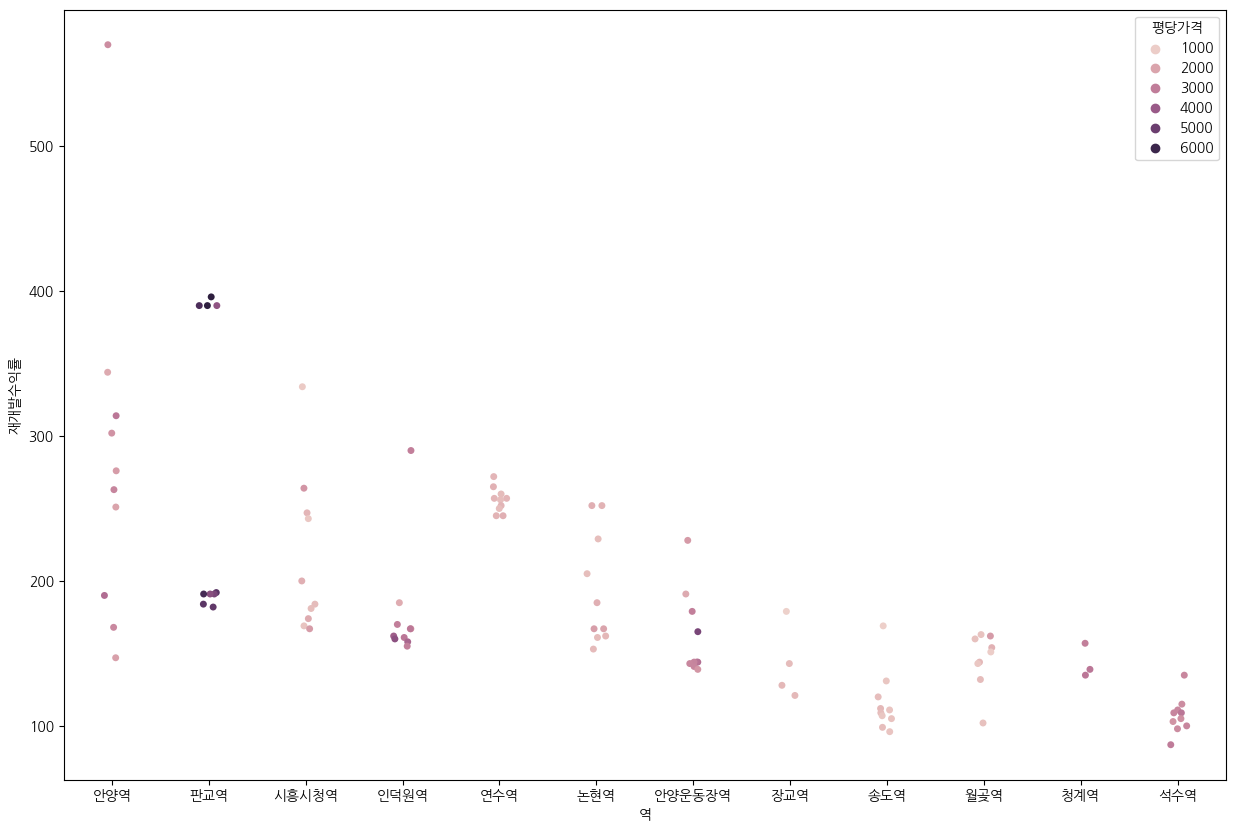

In [39]:
plt.figure(figsize=(15,10))
sns.stripplot(x="역",y="재개발수익률",hue="평당가격",data=rtop_apart, jitter=True)